avg: [0.00030518]
min: [0]
max: [1]
med: [0.]
std: [0.01746662]


/home/jg1223/mambaforge/envs/saefari/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:794: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


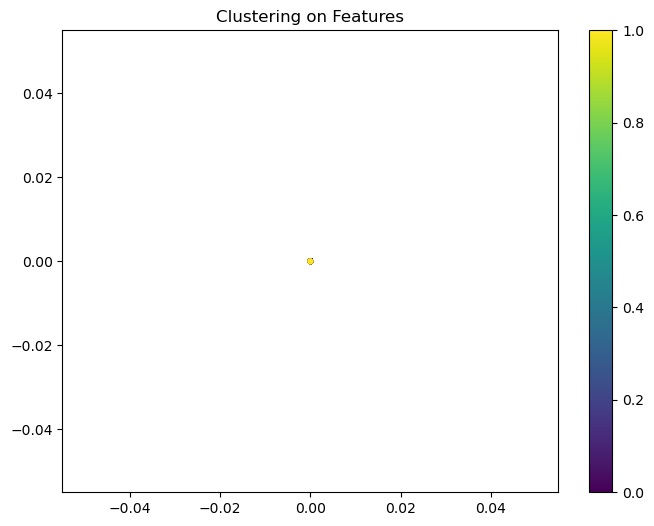

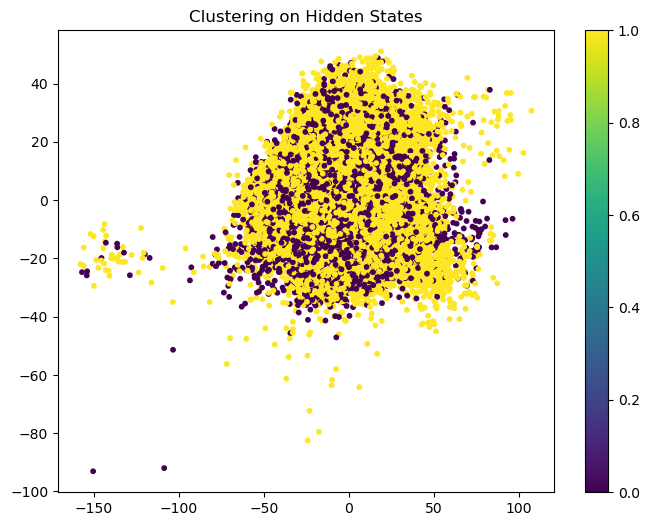

In [ ]:
import numpy as np
import os

n = 0
layer = 6
npz = np.load(
    "output_llm_both/google_gemma-2-2b/gallifantjack_zip_probe/zipcode_income_binary_absolute/train/layer_12/16k/llm_features.npz"
)

features = npz["features"].reshape(-1, 1)

# avg, min, max, med, std in features matrix total
avg = np.mean(features, axis=0)
min_ = np.min(features, axis=0)
max_ = np.max(features, axis=0)
med = np.median(features, axis=0)
std = np.std(features, axis=0)

print(f"avg: {avg}")
print(f"min: {min_}")
print(f"max: {max_}")
print(f"med: {med}")
print(f"std: {std}")


# make a function apply to original feature matrix casting all features to 0 or 1 if they are below or above the median
def binarize(features, med):
    return np.where(features < med, 0, 1)


features_bin = binarize(npz["features"], med)

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load the data
labels = npz["label"]
features = features_bin
hidden_states = npz["hidden_states"]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
hidden_states_scaled = scaler.fit_transform(hidden_states)

# Dimensionality reduction using PCA
pca_features = PCA(n_components=2).fit_transform(features_scaled)
pca_hidden_states = PCA(n_components=2).fit_transform(hidden_states_scaled)


# Visualize the clustering
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(title)
    plt.colorbar()
    plt.show()


plot_clusters(pca_features, labels, "Clustering on Features")
plot_clusters(pca_hidden_states, labels, "Clustering on Hidden States")

/home/jg1223/mambaforge/envs/saefari/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


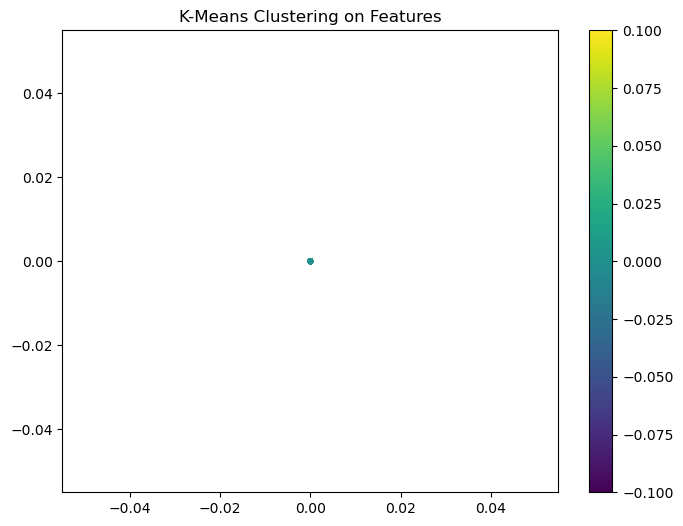

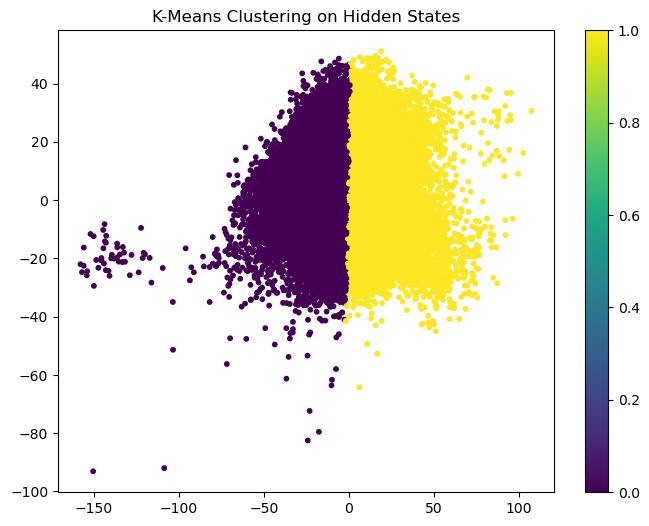

In [ ]:
# # Clustering using K-Means
n_clusters = len(np.unique(labels))  # Number of unique classes
kmeans_features = KMeans(n_clusters=n_clusters, random_state=42).fit(pca_features)
kmeans_hidden_states = KMeans(n_clusters=n_clusters, random_state=42).fit(
    pca_hidden_states
)

# Visualize the clustering
plot_clusters(pca_features, kmeans_features.labels_, "K-Means Clustering on Features")
plot_clusters(
    pca_hidden_states,
    kmeans_hidden_states.labels_,
    "K-Means Clustering on Hidden States",
)

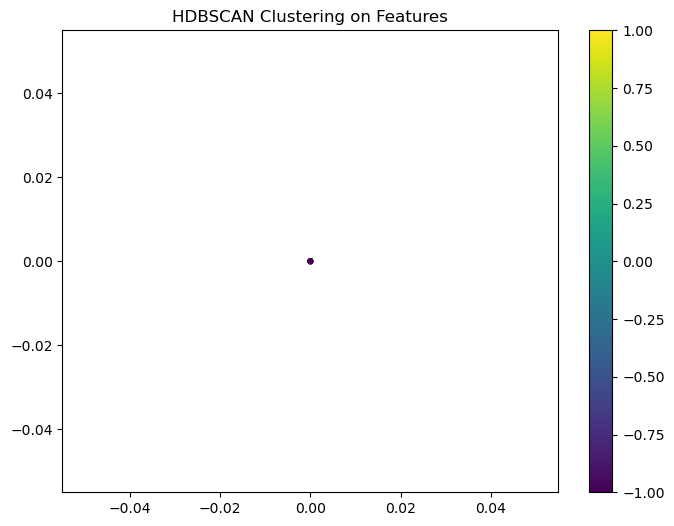

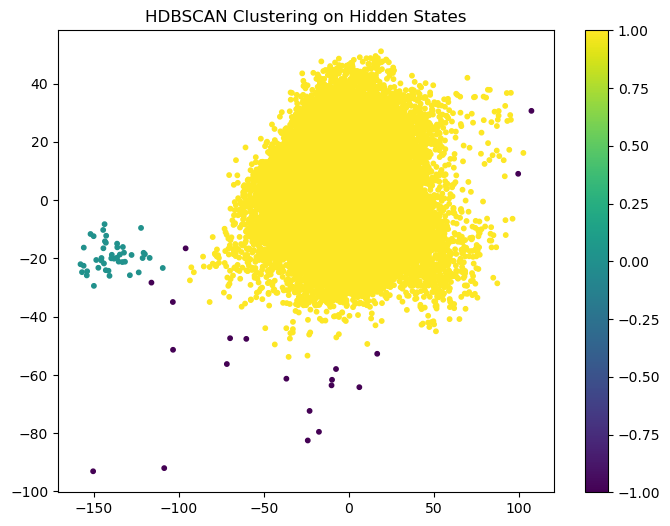

In [ ]:
# Use HDBSCAN for clustering
import hdbscan

clusterer_features = hdbscan.HDBSCAN(min_cluster_size=10).fit(pca_features)
clusterer_hidden_states = hdbscan.HDBSCAN(min_cluster_size=10).fit(pca_hidden_states)

# Visualize the clustering
plot_clusters(
    pca_features, clusterer_features.labels_, "HDBSCAN Clustering on Features"
)
plot_clusters(
    pca_hidden_states,
    clusterer_hidden_states.labels_,
    "HDBSCAN Clustering on Hidden States",
)